Some of the same plots on drinking keyworded over the month of september (500000)

In [1]:
import pickle

%matplotlib inline

from plotting.alcohol import ComparisonPlot

In [2]:
import os
import pandas as pd

In [25]:
import re

In [26]:
pat = re.compile('(.*)(o\'clock)(.*)', re.IGNORECASE)
def pat_filter(text):
    return bool(pat.match(text))
    

In [51]:
keywords = set('''drink drinker drinks drinking drank wine champgne alcohol alcoholics alcoholism beer beers bottle bottles
    pint pints cocktail cocktails bar brewery lounge pub liquor booze vodka tequila gin ciroc margarita margaritas shot shots
    ale whiskey lager tipsy drunk sober wasted pregame pregaming'''.split())

def prefilter(text):
    return bool(set(text.split()).intersection(keywords))

In [106]:
expression ='(.*)(' + '|'.join('''drink drinker drinks drinking drank wine champgne alcohol alcoholics alcoholism beer beers bottle bottles
    pint pints cocktail cocktails bar brewery lounge pub liquor booze vodka tequila gin ciroc margarita margaritas shot shots
    ale whiskey lager tipsy drunk sober wasted pregame pregaming'''.split()) + ')(.*)'
alcohol_filter = re.compile(expression, re.IGNORECASE)
    
def re_filter(text):
    return bool(alcohol_filter.match(text))

In [127]:
df = pickle.load(open('E:/Sept-March 2015/csv with offset/june sample/predict/drinking_labeled_0.p', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'E:/Sept-March 2015/csv with offset/june sample/predict/drinking_labeled_0.p'

In [66]:
df.head()

,Unnamed: 0,Unnamed: 0.1,text,id,created_at,lat,lon,utc_offset,predict_alc,predict_fpa,predict_fpa|alc,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past
created_at,,,,,,,,,,,,,,,,,
2016-03-10 23:21:47,356165,22061,@blkkkchino outro.,708070375448584192,Thu Mar 10 23:21:47 +0000 2016,40.900789,-73.911271,-18000.0,0.415394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-03-10 20:01:33,85804,3041,Cryin bc Gwen is at Disneyland rn,708019983633096705,Thu Mar 10 20:01:33 +0000 2016,33.704538,-118.668404,-25200.0,0.367560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-03-11 02:17:46,671116,44618,U.S. might be 27th in math but we are 1st in s...,708114663377125376,Fri Mar 11 02:17:46 +0000 2016,40.699759,-74.017681,-18000.0,0.884672,0.551279,0.623145,0.492665,0.456237,0.051098,0.271596,0.251514,0.028169
2016-03-10 23:18:45,350188,16084,A Broadway Extravagance...we hope. 💃🏽 @ Someth...,708069613922328577,Thu Mar 10 23:18:45 +0000 2016,40.683935,-74.026675,-28800.0,0.938746,0.607429,0.647064,0.990115,0.008392,0.001493,0.601425,0.005097,0.000907
2016-03-10 21:13:40,223932,26558,@_theycallmezack @danni_anni @marymcash @saige...,708038133187608576,Thu Mar 10 21:13:40 +0000 2016,25.837092,-106.645646,-25200.0,0.050453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
def adjust_timestamp(df):
    """
    df:pd.DataFrame with datetime index and utc_offset columns
    """
    us = df[(df.utc_offset <=-14400)  & (df.utc_offset >= -28800)]
    us.index = us.index + us.utc_offset.apply(lambda x: pd.to_timedelta(x, unit='s'))
    return us

In [88]:
%%time
within_us = adjust_timestamp(df)

Wall time: 31.9 s


In [92]:
within_us.shape

(320655, 17)

In [27]:
%%time

casual = pd.Series()
looking = pd.Series()
reflecting = pd.Series()
all_drinking = pd.DataFrame()
for file in os.listdir('E:/Sept-March 2015/csv with offset/sept sample/15 percent/predict'):
    df = pickle.load(open('E:/Sept-March 2015/csv with offset/sept sample/15 percent/predict/' + file, 'rb'))
    
#     print(df.shape)
    
    df = adjust_timestamp(df)
    drinking = df[df.text.apply(pat_filter)]
    all_drinking = pd.concat([all_drinking, drinking])
    casual = pd.concat([casual, df[df.predict_present > 0.6].text])
    looking = pd.concat([looking, df[df.predict_future > 0.6].text])
    reflecting = pd.concat([reflecting, df[df.predict_past > 0.6]])

Wall time: 8min 29s


C:\Users\Tom Work\Anaconda3\lib\site-packages\pandas\indexes\api.py:71: RuntimeWarning: unorderable types: int() < str(), sort order is undefined for incomparable objects
  result = result.union(other)


In [6]:
combined = pd.concat([casual, looking, reflecting], axis=1)
combined.shape

(5878429, 3)

In [7]:
combined.columns = ['casual', 'looking', 'reflecting']

In [15]:
pickle.dump(combined,open('E:/sept_fpl_15.p', 'wb'))

In [2]:
drinking = pickle.load(open('pickles/sept_drinking_labeled.p', 'rb'))

In [3]:
drinking.shape

(498509, 15)

In [4]:
drinking.head()

,Unnamed: 0,Unnamed: 0.1,text,id,created_at,random_number,predict_alc,predict_fpa,predict_fpa|alc,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past
created_at,,,,,,,,,,,,,,,
2015-09-01 00:34:07,369510,34859,Bitch you look like a pack of chickens drinkin...,638510110281699328,Tue Sep 01 00:34:07 +0000 2015,8936304477203603732,0.997060,0.307606,0.308513,0.029184,0.031485,0.939331,0.008977,0.009685,0.288944
2015-09-01 00:49:36,370650,35999,@SkittlesCanFly_ lies. You drink water you hyd...,638514005808672768,Tue Sep 01 00:49:36 +0000 2015,7203717350631723890,0.031360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-09-01 01:07:56,372393,37742,Drinkin out the bottle 👀😂😂,638518618343477248,Tue Sep 01 01:07:56 +0000 2015,-6897460529745918969,0.526372,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-09-01 01:11:12,372683,38032,I swear I hope this drink relaxes me to the core,638519440217374720,Tue Sep 01 01:11:12 +0000 2015,-7064333736343174870,0.989091,0.595163,0.601727,0.227778,0.735366,0.036856,0.135565,0.437662,0.021935
2015-09-01 01:20:26,373453,38802,"Whoa ok I'm drunk (@ BARn in Astoria, NY) http...",638521764058955776,Tue Sep 01 01:20:26 +0000 2015,-224048180445183780,0.957415,0.661896,0.691336,0.991044,0.006467,0.002489,0.655968,0.004281,0.001647


In [13]:
ComparisonPlot.formatting()

In [6]:
ComparisonPlot.setup(drinking)

C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["first_person_alcohol"][of_interest] = 1


In [97]:
june = june.sort_index()

Wall time: 244 ms


In [102]:
june = june[4:]

In [10]:
import matplotlib.pyplot as plt

In [20]:
def plot_hourly_ts(df):
    weekday_map = 'Su M Tu W Th F Sa'.split()
    temp = df.groupby([df.index.day, df.index.hour]).agg(
                {"mean": "mean", "err": ComparisonPlot.centered_95int}       
        )
    stds = temp['err']
    means = temp['mean']
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(range(len(means)), means, '.-')
    
    ax.set_xlim([0, len(means)])
    ax.set_xticks(range(0, len(means), 24))
    ax.grid()
    dates = means.index.levels[0]
#     dayofweek_index = [weekday_map[df[df.index.day == date].index[0].dayofweek] for date in dates]
    ax.set_xticklabels(dates)
    return means

1   0     0.007240
    1     0.008214
    2     0.009633
    3     0.005942
    4     0.013149
    5     0.008859
    6     0.005382
    7     0.006930
    8     0.008802
    9     0.004568
    10    0.005403
    11    0.006563
    12    0.006039
    13    0.005333
    14    0.004492
    15    0.005963
    16    0.007201
    17    0.006993
    18    0.007694
    19    0.010256
    20    0.009131
    21    0.008412
    22    0.008851
    23    0.007631
2   0     0.009250
    1     0.009796
    2     0.008226
    3     0.013103
    4     0.008152
    5     0.005547
            ...   
30  1     0.009588
    2     0.010565
    3     0.008564
    4     0.010309
    5     0.006332
    6     0.004304
    7     0.005793
    8     0.007107
    9     0.006189
    10    0.005644
    11    0.006646
    12    0.004506
    13    0.006867
    14    0.005293
    15    0.007737
    16    0.006351
    17    0.007614
    18    0.012065
    19    0.009190
    20    0.009633
    21    0.007284
    22    0.

C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


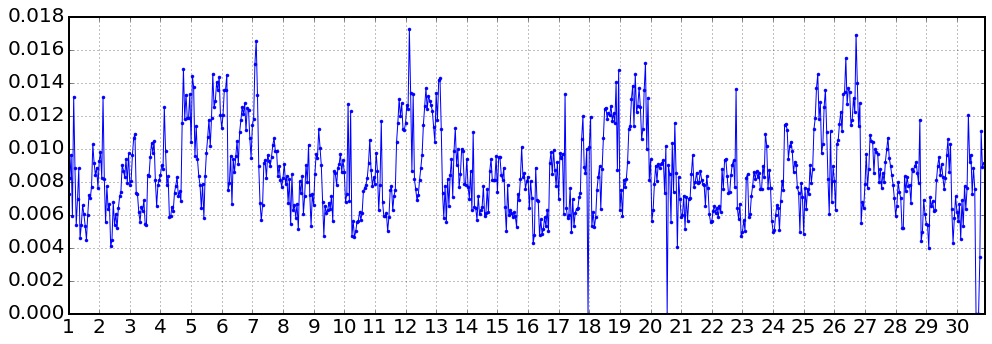

In [21]:
plot_hourly_ts(combined.casual)

C:\Users\Tom Work\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


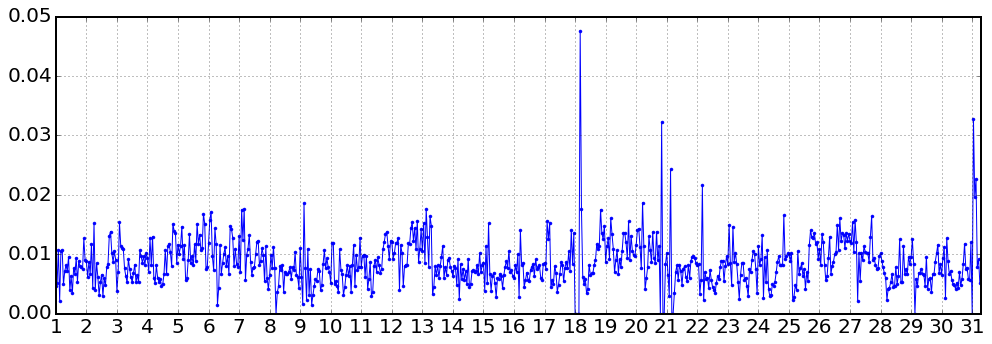

In [25]:
march_means = plot_hourly_ts(combined.casual)

In [25]:
pickle.dump(sept_means, open('pickles/sept2015_fpl.p', 'wb'))

C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


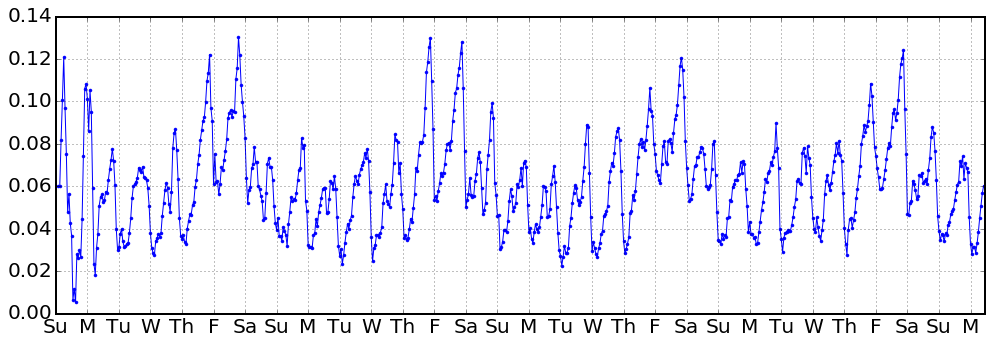

In [103]:
plot_hourly_ts(june.casual)

In [27]:
combined.head()

,casual,looking,reflecting
2015-06-02 21:46:11,False,False,False
2015-06-02 19:15:08,False,False,False
2015-06-02 21:07:41,False,False,False
2015-06-02 20:43:48,False,False,False
2015-06-02 20:06:38,False,False,False


C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:81: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  means = pd.rolling_mean(temp[[1, 3, 5]], window)
C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:83: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  stds = pd.rolling_mean(temp[[0, 2, 4]], window)
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


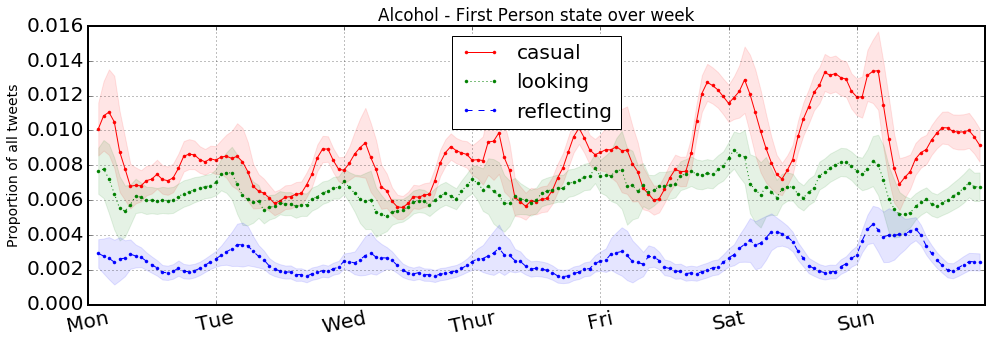

In [14]:
ComparisonPlot.plot_fps_week(combined, '')

In [9]:
def plot_fps_week(df, folder, window=3):
    temp = df.groupby([df.index.dayofweek, df.index.hour]).agg(
        {
            _: {"mean": "mean", "err": ComparisonPlot.centered_95int} for _ in ['casual', 'looking', 'reflecting']
            }
    )
    stds= pd.rolling_mean(temp[[1, 3, 5]], window)

    means = pd.rolling_mean(temp[[0, 2, 4]], window)

    means.columns = [col[0] for col in means.columns.values]
    stds.columns = [col[0] for col in stds.columns.values]

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.plot(range(len(means)), means.casual, "r.-", label="casual")
    ax.fill_between(
        x=range(len(means)),
        y1=means.casual - stds.casual,
        y2=means.casual + stds.casual,
        color='r', alpha=.1
    )

    ax.plot(range(len(means)), means.looking, "g.:", label="looking")
    ax.fill_between(
        x=range(len(means)),
        y1=means.looking - stds.looking,
        y2=means.looking + stds.looking,
        color="g", alpha=.1
    )

    ax.plot(range(len(means)), means.reflecting, "b.--", label="reflecting")
    ax.fill_between(
        x=range(len(means)),
        y1=means.reflecting - stds.reflecting,
        y2=means.reflecting + stds.reflecting,
        color="b", alpha=.1
    )

    ax.set_xlim([0, 24 * 7])

    ax.set_xticks(range(0, 24 * 7, 24))
    ax.set_xticklabels(["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], rotation=12)
    ax.set_title("Alcohol - First Person state over week")
    ax.set_ylabel("Proportion of all tweets")
    ax.legend(loc="best")
    ax.grid()

C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
C:\Users\Tom Work\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()


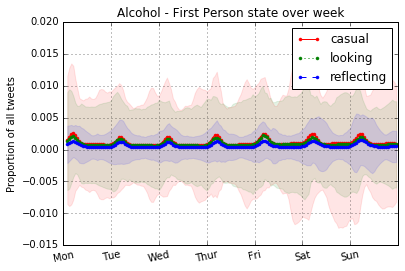

In [11]:
plot_fps_week(combined, '', window=3)

C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:74: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  means = pd.rolling_mean(temp[[1, 3, 5]], 3)
C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:76: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  stds = pd.rolling_mean(temp[[0, 2, 4]], 3)
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


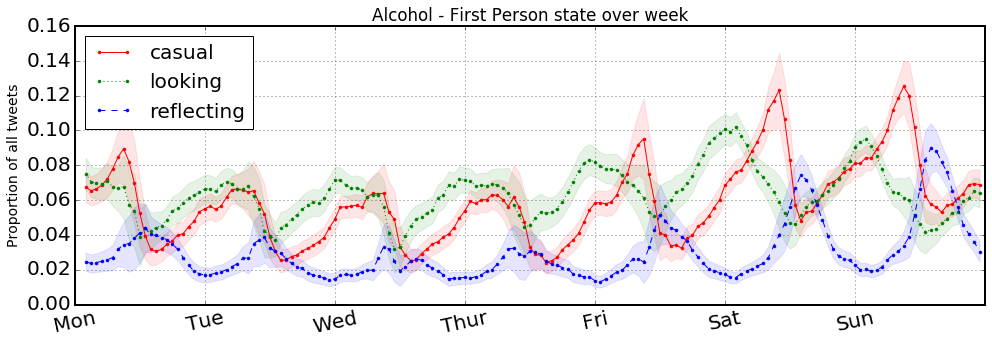

In [7]:
plot.plot_fps_week(drinking, '')

In [125]:
june = pickle.load(open('pickles/june_new_drinking_labeled.p', 'rb'))


In [126]:
june.head()

,Unnamed: 0,Unnamed: 0.1,text,id,created_at,predict_alc,predict_fpa,predict_fpa|alc,predict_present|fpa,predict_future|fpa,predict_past|fpa,predict_present,predict_future,predict_past
created_at,,,,,,,,,,,,,,
2015-06-02 18:48:06,54,54,@CoryBooker this is a bad idea because so many...,605808120888094722,Tue Jun 02 18:48:06 +0000 2015,0.842098,0.390094,0.46324,0.016014,0.596706,0.387279,0.006247,0.232772,0.151075
2015-06-02 18:48:08,130,130,"you're at least 20 years older than me, we are...",605808132841832448,Tue Jun 02 18:48:08 +0000 2015,0.237864,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-06-02 18:48:10,177,177,Psychedelic Frog at Plucker's &gt;&gt;&gt;&gt;...,605808139313684481,Tue Jun 02 18:48:10 +0000 2015,0.660933,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-06-02 18:48:13,274,274,I shot the sheriff but I didn't shoot the deputy,605808151753945088,Tue Jun 02 18:48:13 +0000 2015,0.006013,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-06-02 18:48:14,295,295,I'm not sure this is a profitable skill but I ...,605808154857775105,Tue Jun 02 18:48:14 +0000 2015,0.989421,0.694524,0.70195,0.723388,0.004534,0.272078,0.502410,0.003149,0.188965


In [104]:
march = pickle.load(open('pickles/march_new_drinking_labeled.p', 'rb'))

In [105]:
%%time
march.index = pd.to_datetime(march.index)

Wall time: 4min 12s


In [4]:
import pandas as pd

In [5]:
%%time
june.index = pd.to_datetime(june.index)

Wall time: 5min 56s


In [7]:
pickle.dump(june, open('pickles/june_new_drinking_labeled.p', 'wb'))

C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["first_person_alcohol"][of_interest] = 1
C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:79: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  means = pd.rolling_mean(temp[[1, 3, 5]], 3)
C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:81: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=3).mean()
  stds = pd.rolling_mean(temp[[0, 2, 4]], 3)
C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that

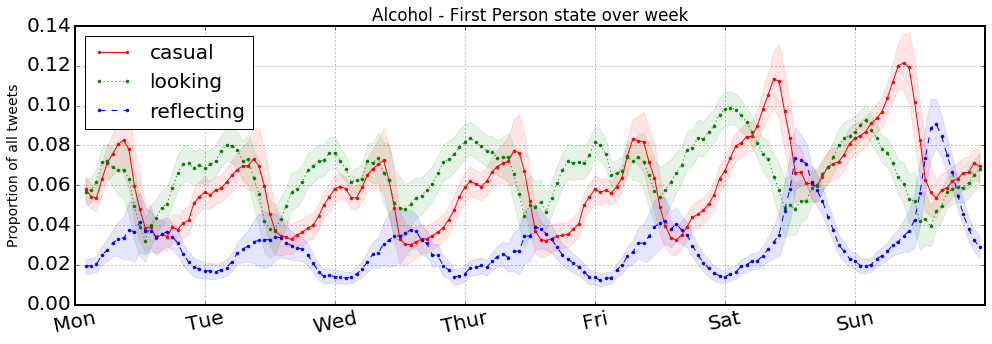

In [127]:
plot.setup(june)
plot.plot_fps_week(june, '')

In [16]:
june.shape

(520605, 18)

In [22]:
june[june.casual][['text', 'predict_present']].sample(5)

,text,predict_present
created_at,,
2015-06-27 08:27:48,Eating Steak 'n Shake and drinking a beer at 3...,0.745726
2015-06-09 04:27:44,A little wine with cheese. In 1st wine cave. G...,0.633007
2015-06-24 03:54:10,Smfh my brother recorded and my dad offered th...,0.620441
2015-06-17 23:01:13,Somewhere between I'm sober and I'm lifted,0.619380
2015-06-29 01:37:12,When mom buys us margaritas and beer&gt;,0.660225


In [106]:
march.shape

(391968, 14)

In [107]:
plot.setup(march)

C:\Users\Tom Work\PycharmProjects\nyu-twipsy\plotting\alcohol.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df["first_person_alcohol"][of_interest] = 1


C:\Users\Tom Work\Anaconda3\lib\site-packages\matplotlib\figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


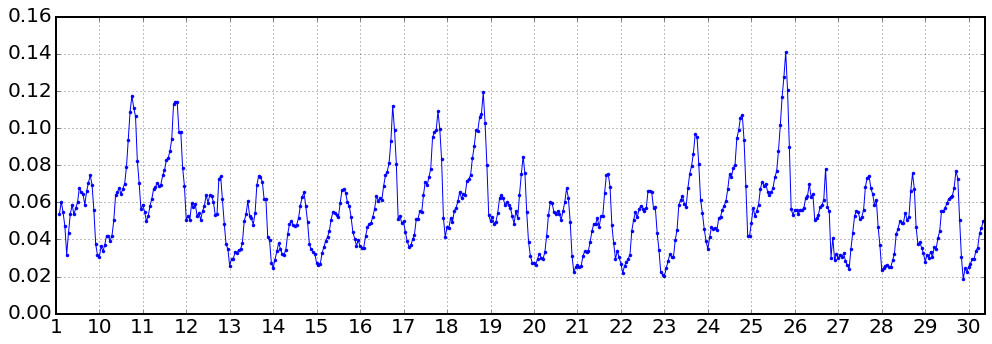

In [117]:
plot_hourly_ts(march.casual)

In [121]:
sum(june.predict_alc > 0.6)

362462